
# Examples

In [1]:
# setup

import math
import random
import matplotlib.pyplot as plt

# make plots render in the notebook, instead of in an external window,
# which tends to be annoying
%matplotlib inline


In [2]:
# want to swap the case of s[n]
# this won't work - can't modify a string

def swapone(s, n):
    c = s[n]
    # get the char, swap it
    c = c.swapcase()
    # and put back in the string
    s[n] = c
    return s

swapone('abcd', 2)

TypeError: 'str' object does not support item assignment

In [3]:
# take 2

def swapone2(s, n):
    # take the string apart
    left = s[:n]
    right = s[n+1:]
    swap = s[n].swapcase()
    # and put it back together
    return left + swap + right
    
swapone2('abcd', 2)

'abCd'

In [4]:
list('asdf')

['a', 's', 'd', 'f']

In [5]:
# take 3

def swapone3(s, n):
    # convert to a list!!
    sl = list(s)
    # list can be updated
    sl[n] = sl[n].swapcase()
    # convert back to string
    print(sl)
    return ''.join(sl)

swapone3('abcd', 2)

['a', 'b', 'C', 'd']


'abCd'

# Structure sharing

In [6]:
# lists are zero origin

x = [[1,2],[3,4],[5,6]]
x

[[1, 2], [3, 4], [5, 6]]

In [7]:
# 2nd element of outer list, then 1st element of [3,4]

x[1][0]

3

In [8]:
x[1][0] = 55
x

[[1, 2], [55, 4], [5, 6]]

In [9]:
y = 5*[[1,2]]
y

[[1, 2], [1, 2], [1, 2], [1, 2], [1, 2]]

In [10]:
# why so many 55's? 
# because 5*[[1,2]] made a len 5 list, then
# filled it with references to the same [1,2] list. 
# only one [1,2] was constructed, not 5

y[1][0] = 55
y

[[55, 2], [55, 2], [55, 2], [55, 2], [55, 2]]

In [11]:
y[0] is y[1] is y[2]

True

In [12]:
# this will make 5 separate [1,2] lists

z = [[1,2] for j in range(5)]
z

[[1, 2], [1, 2], [1, 2], [1, 2], [1, 2]]

In [13]:
z[0] is z[1]

False

In [14]:
# the other four [1,5] lists are not affected 

z[1][0] = 55
z

[[1, 2], [55, 2], [1, 2], [1, 2], [1, 2]]

In [15]:
# this was a typo i made
# what is it doing?

z = [[1,2] for j in range(5)]
z[[1][0]] = 55
z

[[1, 2], 55, [1, 2], [1, 2], [1, 2]]

# define rcount
- recursively count elements in a nested list
- a common pattern for recursing thru a nested list is to split the list into the first element, and the rest of the list, then recurse on each piece
- if you are not familar with recursion, I will cover it in the next class


In [16]:
def rcount(x):
    if isinstance(x, list):
        # x is a list, get the length
        xlen = len(x)
        if xlen == 1:
            return(rcount(x[0]))
        else:
            # use an array access and a slice
            # to subdivide list
            return rcount(x[0]) + rcount(x[1:])

    # x is not a list, so just counts as 1
    return(1)


In [17]:
rcount([1,2,[3,4,[5,6,7],8],9])

9

# Histogram of Guassian samples

In [18]:
# mean = 0, stddev = 1

[random.gauss(0,1) for j in range(10)]

[0.05885332833576429,
 0.425418401574395,
 -1.2547376259741498,
 -0.2829826592391403,
 0.17238006654796997,
 -0.7702283883562511,
 1.2836252758740865,
 -1.0926753067897654,
 -1.0099278524605617,
 0.7331069484063992]

In [19]:
# get 100,100 samples, and filter out data greater than 2 SD

gd = [d for d in [random.gauss(0,1) for j in range(100000)] if abs(d)<2]
len(gd)

95516

In [20]:
# int seems like an easy way to compute bin numbers
# truncates the fraction

[int(3.4), int(-3.2)]

[3, -3]

In [21]:
# list of bins each data point fell into


bins = [int((d /.2)) for d in gd]
bins[:20]

[6, 7, 2, 2, -3, -4, 6, -3, 1, -6, 6, 4, -4, -8, -2, -1, 2, 5, 1, -6]

In [22]:
# sort the bin numbers. 
# range from -10 to 9 

bins.sort()
[bins[0],bins[-1], len(bins)]

[-9, 9, 95516]

In [23]:
# offset bins so smallest bin number = 0

bins2 = [b - bins[0] for b in bins]
[bins2[0], bins2[-1]]

[0, 18]

In [24]:
# make a list of zeros that we can increment
# to record the number of points in each bucket

cnts = [0] * (bins2[-1]+1)
cnts

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [25]:
for b in bins2:
    cnts[b] += 1
cnts

[1288,
 1834,
 2592,
 3443,
 4375,
 5299,
 6341,
 6987,
 7596,
 15869,
 7708,
 7109,
 6197,
 5353,
 4325,
 3471,
 2522,
 1882,
 1325]

<Container object of 19 artists>

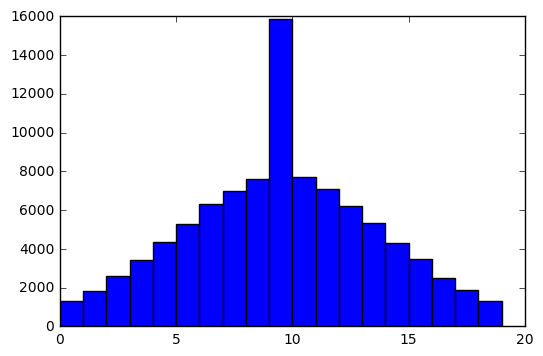

In [26]:
# hmmm...

plt.bar(range(len(cnts)), cnts, 1)

In [27]:
# let's try to figure out why 'int' doesn't work by plotting 

# to plot a function, we need to generate a list of x values...
# but, range doesn't work with floats!

range(0,1,.1)

TypeError: 'float' object cannot be interpreted as an integer

In [28]:
# make a float version of range

def frange(start, end, n):
    inc = (end - start)/float(n)
    return [start+j*inc for j in range(n)]

frange(0,1,10)

[0.0,
 0.1,
 0.2,
 0.30000000000000004,
 0.4,
 0.5,
 0.6000000000000001,
 0.7000000000000001,
 0.8,
 0.9]

In [29]:
def plotf(func):
    # arg is function to plot
    # make a set of x vals
    x = frange(-3,3,50)
    # eval the func on the x vals
    y = [func(xv) for xv in x]
    plt.plot(x, y, 'r', linewidth=10)
    plt.grid(True)

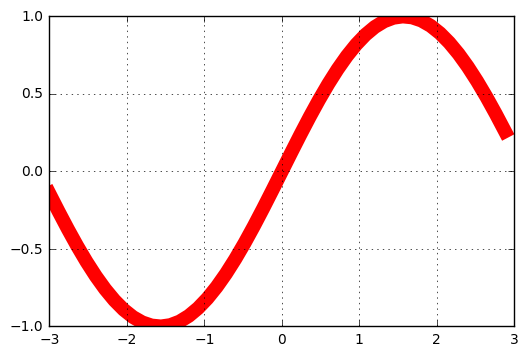

In [30]:
# test

plotf(math.sin)

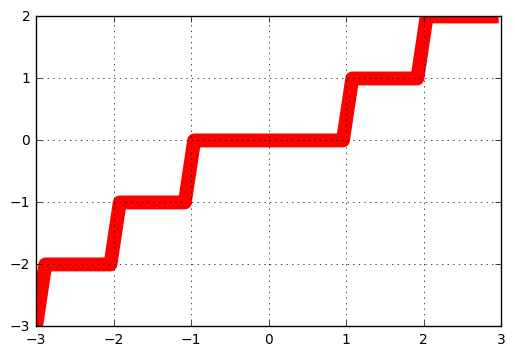

In [31]:
# now we see the problem - int is making the middle 
# bucket twice as wide as the other buckets

plotf(int)

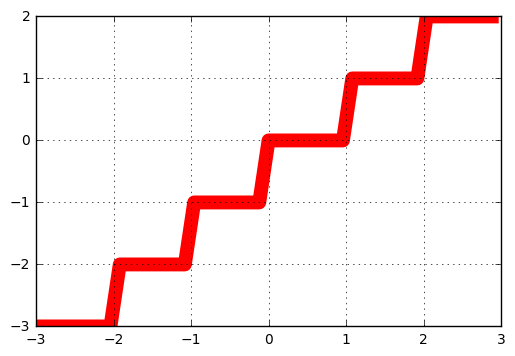

In [32]:
# math.floor does the right thing

plotf(math.floor)

# Fix
in code above, change 

bins = [int((d /.2)) for d in gd]

to

bins = [math.floor((d /.2)) for d in gd]

and run again

# 7 segment display
- cheap displays
    - clock radios
    - elevators
- [wiki article](https://en.wikipedia.org/wiki/Seven-segment_display)


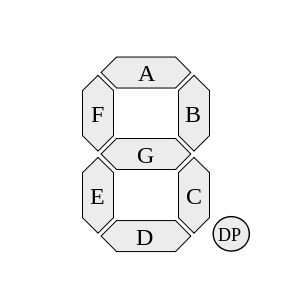

In [33]:
from IPython.display import Image

Image('https://upload.wikimedia.org/wikipedia/commons/thumb/0/02/7_segment_display_labeled.svg/300px-7_segment_display_labeled.svg.png')

In [34]:
# a '1' means turn on the corresponding segment
# each tuple is (a,b,c,d,e,f,g)

segs = {' ':(0,0,0,0,0,0,0),
    '0':(1,1,1,1,1,1,0),
    '1':(0,1,1,0,0,0,0),
    '2':(1,1,0,1,1,0,1),
    '3':(1,1,1,1,0,0,1),
    '4':(0,1,1,0,0,1,1),
    '5':(1,0,1,1,0,1,1),
    '6':(1,0,1,1,1,1,1),
    '7':(1,1,1,0,0,0,0),
    '8':(1,1,1,1,1,1,1),
    '9':(1,1,1,1,0,1,1)}

In [35]:
# each segment is 1 long
# origin is at lower left

def seven(digit):
    # n or 'n' as arg
    a,b,c,d,e,f,g = segs[str(digit)]
    if a:
    # define line with two points
        pts = [[0,2], [1,2]]
        draw(pts)
    if b:
        pts = [[1,1], [1,2]]
        draw(pts)
    if c:
        pts = [[1,0], [1,1]]
        draw(pts)
    if d:
        pts = [[0,0], [1,0]]
        draw(pts)
    if e:
        pts = [[0,0],[0,1]]
        draw(pts)
    if f:
        pts = [[0,1],[0,2]]
        draw(pts)
    if g:
        pts = [[0,1],[1,1]]
        draw(pts)

    # trick to fix aspect ratio
    plt.plot([1,1], [0,1])
    
def draw(pts):
    pt1,pt2 = pts
    x = [pt1[0]*.5, pt2[0]*.5]
    y = [pt1[1], pt2[1]]
    plt.plot(x, y, linewidth=40, color='r')

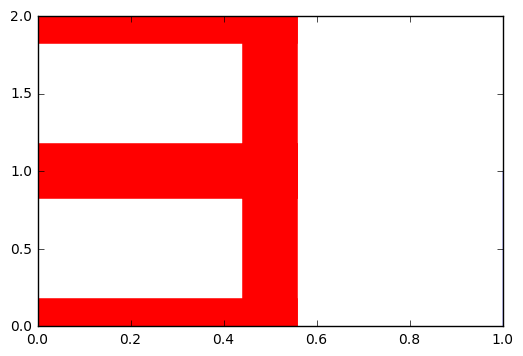

In [36]:
seven(3)

In [37]:
# i don't like the above representation, find it hard to read
# so, i will convert to something i find more user friendly
# now i can easily see which segments to turn on

import string
   
alpha = {}

for key in segs.keys():
    val = segs[key]
    seglist = [a for a,n in zip(string.ascii_lowercase, val) if n]
    alpha[key] = seglist
        
alpha

{' ': [],
 '0': ['a', 'b', 'c', 'd', 'e', 'f'],
 '1': ['b', 'c'],
 '2': ['a', 'b', 'd', 'e', 'g'],
 '3': ['a', 'b', 'c', 'd', 'g'],
 '4': ['b', 'c', 'f', 'g'],
 '5': ['a', 'c', 'd', 'f', 'g'],
 '6': ['a', 'c', 'd', 'e', 'f', 'g'],
 '7': ['a', 'b', 'c'],
 '8': ['a', 'b', 'c', 'd', 'e', 'f', 'g'],
 '9': ['a', 'b', 'c', 'd', 'f', 'g']}

In [38]:
segs

{' ': (0, 0, 0, 0, 0, 0, 0),
 '0': (1, 1, 1, 1, 1, 1, 0),
 '1': (0, 1, 1, 0, 0, 0, 0),
 '2': (1, 1, 0, 1, 1, 0, 1),
 '3': (1, 1, 1, 1, 0, 0, 1),
 '4': (0, 1, 1, 0, 0, 1, 1),
 '5': (1, 0, 1, 1, 0, 1, 1),
 '6': (1, 0, 1, 1, 1, 1, 1),
 '7': (1, 1, 1, 0, 0, 0, 0),
 '8': (1, 1, 1, 1, 1, 1, 1),
 '9': (1, 1, 1, 1, 0, 1, 1)}

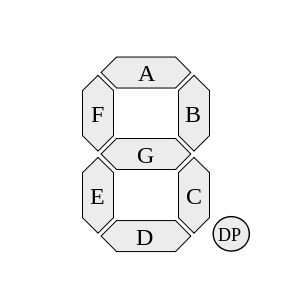

In [39]:
from IPython.display import Image

Image('https://upload.wikimedia.org/wikipedia/commons/thumb/0/02/7_segment_display_labeled.svg/300px-7_segment_display_labeled.svg.png')

In [40]:
# each segment is 1 long
# origin is at lower left
# a bad thing about the first version
# and this one is alot of data is 
# encoded into the function. 

def seven2(digit):
    digit = str(digit)
    for seg in alpha[digit]:
        # optimize if's?
        if seg == 'a':
            # define line with two points
            pts = [[0,2], [1,2]]
        if seg == 'b':
            pts = [[1,1], [1,2]]
        if seg == 'c':
            pts = [[1,0], [1,1]]
        if seg == 'd':
            pts = [[0,0], [1,0]]
        if seg == 'e':
            pts = [[0,0],[0,1]]
        if seg == 'f':
            pts = [[0,1],[0,2]]
        if seg == 'g':
            pts = [[0,1],[1,1]]
        pt1,pt2 = pts
        x = [pt1[0]*.5, pt2[0]*.5]
        y = [pt1[1], pt2[1]]
        plt.plot(x, y, linewidth=40, color='r')
    # trick to fix aspect ratio
    plt.plot([1,1], [0,1])

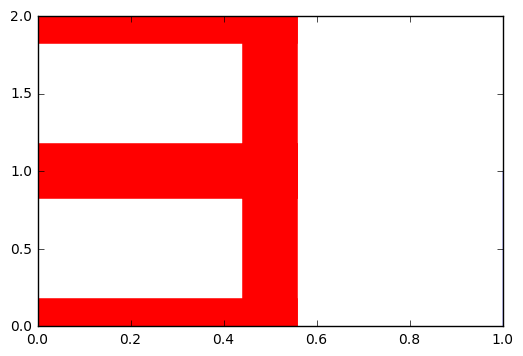

In [41]:
seven2(3)

In [54]:
# much better to put data in a data structure

# each segment is 1 long
# origin is at lower left

ptsd = dict()
ptsd['a'] = [[0,2], [1,2]]
ptsd['b'] = [[1,1], [1,2]]
ptsd['c'] = [[1,0], [1,1]]
ptsd['d'] = [[0,0], [1,0]]
ptsd['e'] = [[0,0],[0,1]]
ptsd['f'] = [[0,1],[0,2]]
ptsd['g'] = [[0,1],[1,1]]

# now a simple function, with almost no data in it

def seven3(digit):
    digit = str(digit)
    for seg in alpha[digit]:
        pts = ptsd[seg]
        pt1,pt2 = pts
        x = [pt1[0]*.5, pt2[0]*.5]
        y = [pt1[1], pt2[1]]
        plt.plot(x, y, linewidth=40, color='r')
    # trick to fix aspect ratio
    plt.plot([1,1], [0,1])

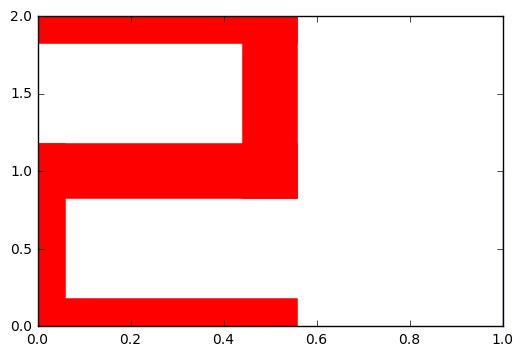

In [55]:
seven3(2)

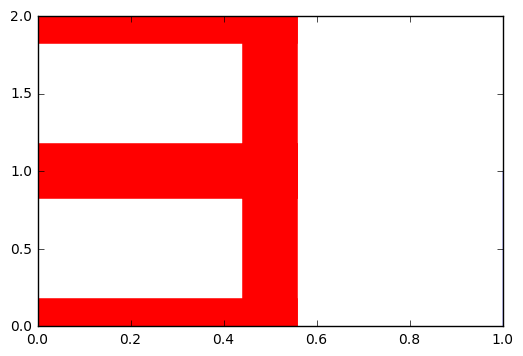

In [56]:
seven3(3)

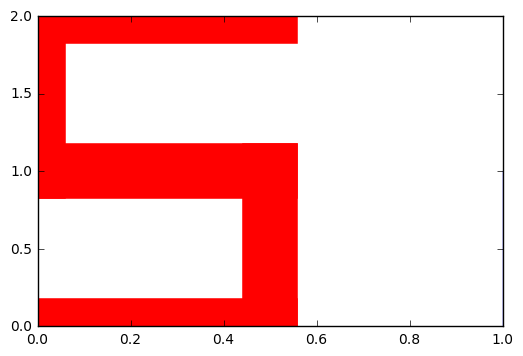

In [57]:
seven3(5)

# Change of a dollar

In [58]:
# saving state in globals - ok for small/informal programs,
# but later we will see how to make a class
# note coins is a tuple, since the value of each 
# coin type never changes

coins = (25, 10, 5, 1)
coinInventory = [2, 3, 10, 7]

def change(price):
    owe = 100 - price
    ans = [0]*len(coins)
    for j in range(len(coins)):
        cval = coins[j]
        cinv = coinInventory[j]
        cnt = owe // cval 
        cnt = min(cnt, cinv)
        ans[j] = cnt
        coinInventory[j] -= cnt
        owe -= cnt * cval
        if owe == 0:
            break
    # return amount still owed, if any
    # coins returned
    # coins left in inventory
    return [owe,ans,coinInventory]
    
 

In [60]:
# // is integer division

5//2

2

In [61]:
change(74)

[0, [1, 0, 0, 1], [1, 3, 10, 6]]

In [62]:
change(74)

[0, [1, 0, 0, 1], [0, 3, 10, 5]]

In [63]:
change(74)

[0, [0, 2, 1, 1], [0, 1, 9, 4]]

In [64]:
change(74)

[0, [0, 1, 3, 1], [0, 0, 6, 3]]

In [65]:
change(74)

[0, [0, 0, 5, 1], [0, 0, 1, 2]]

In [66]:
# ran out of coins

change(74)

[19, [0, 0, 1, 2], [0, 0, 0, 0]]